In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from src.core import * 
from src.visualization import pretty_picture_of_curve_ax
from src.models import IsotropicGaussian


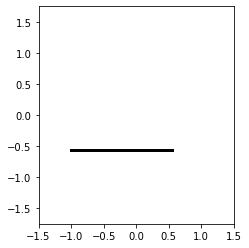

In [37]:
grid = make_knot_grid(10, -1, 1)
knots = sample_knots(grid, number_of_knot_points=2)
curve,_ = make_curve(knots)

fig, ax = plt.subplots(figsize=(3.5, 4))
pretty_picture_of_curve_ax(ax, curve)
plt.show()

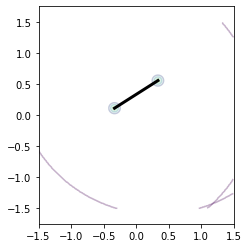

In [10]:
C, tau = 11, 7

model = IsotropicGaussian(knots, C, tau)

fig, ax = plt.subplots(figsize=(3.5, 4))
model.visualize(ax)
plt.show()

In [11]:
def slope(p1, p2):
    return (p2[1] - p1[1]) / (p2[0] - p1[0])

0.0030788925535813146
0.04816198282664061
0.19048433720734687
0.378823338772799


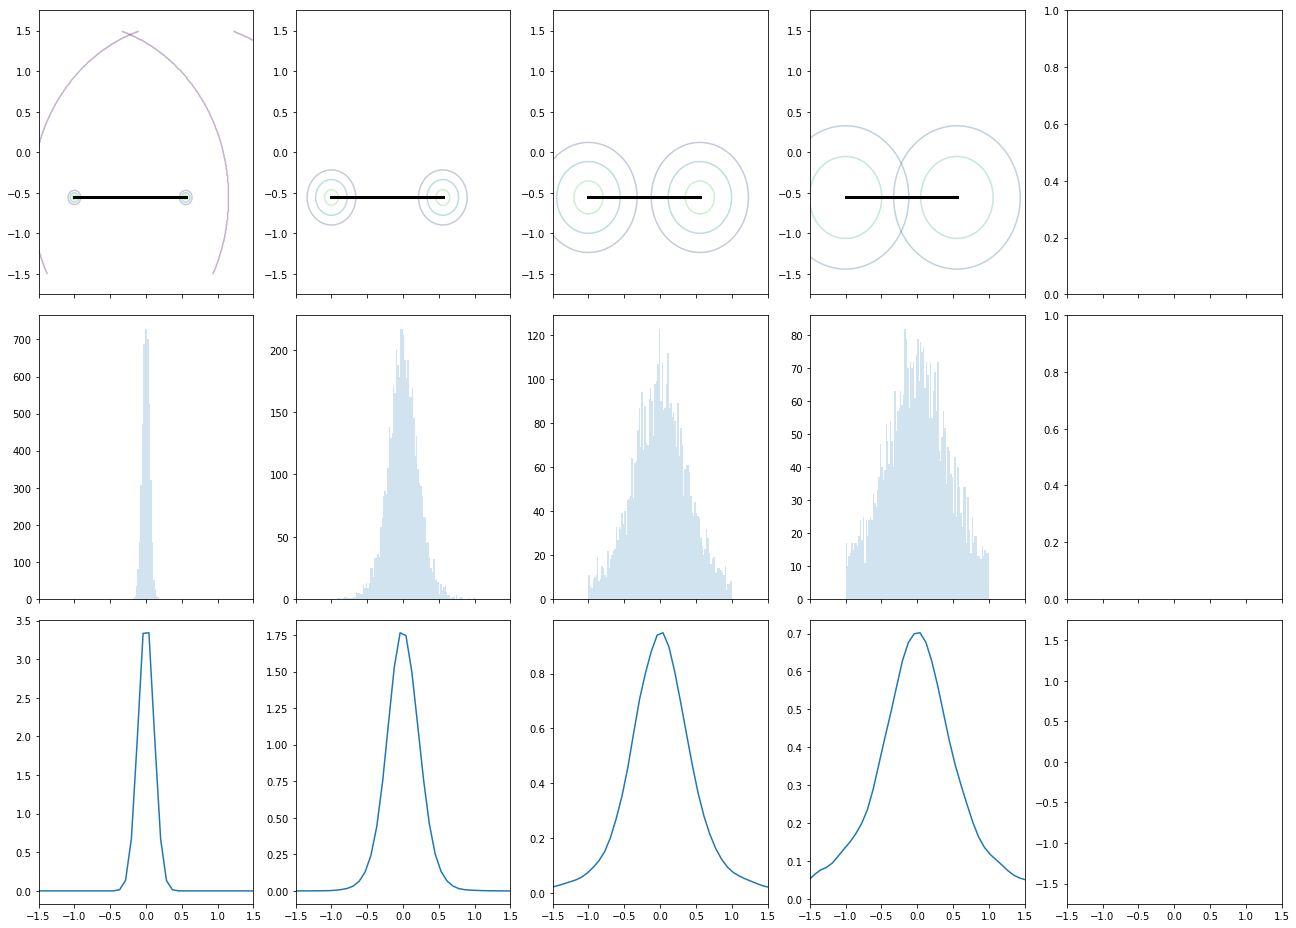

In [38]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(18, 13), sharex=True)
n_samples = 5000
for i,n_items in enumerate([1, 2, 4, 8]):
    a = np.sqrt(np.exp(2* (tau - (C/(2*n_items)) - (2*np.pi) -1)))
    print(a)
    model = IsotropicGaussian(knots, C, tau, a=a)
    model.visualize(ax[0][i])
    curves, samples = model.sample_curves(n=n_samples, return_samples=True)
    slopes = np.array ([slope(s[0], s[1]) for s in samples]) - slope(knots[0], knots[1])
    ax[1][i].hist(slopes, range=(-1, 1), bins=100, alpha=.2)
    slopes = np.array ([slope(s[0], s[1]) for s in samples]) - slope(knots[0], knots[1])
    kde = KernelDensity(kernel="gaussian", bandwidth=.1).fit(slopes.reshape(-1, 1))
    x = np.linspace(-2, 2, 50)
    log_dens = kde.score_samples(x.reshape(-1, 1))
    ax[2][i].plot(x, np.exp(log_dens))
plt.tight_layout()
plt.show()

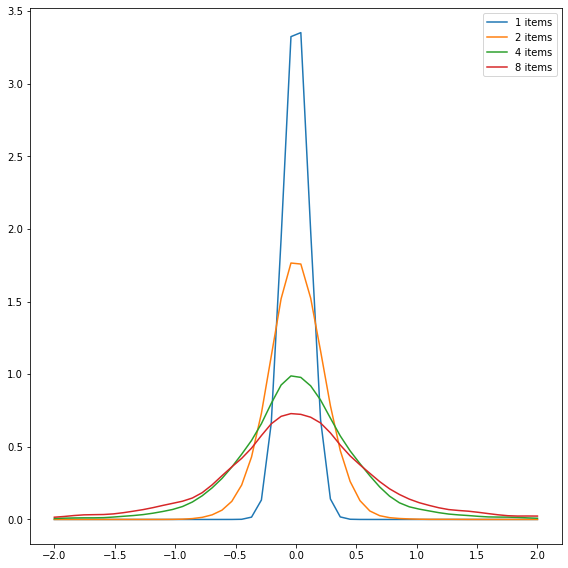

In [39]:
fig, ax = plt.subplots(figsize=(8, 8))
n_samples = 5000
for i,n_items in enumerate([1, 2, 4, 8]):
    a = np.sqrt(np.exp(2* (tau - (C/(2*n_items)) - (2*np.pi) -1)))
    model = IsotropicGaussian(knots, C, tau, a=a)
    curves, samples = model.sample_curves(n=n_samples, return_samples=True)
    slopes = np.array ([slope(s[0], s[1]) for s in samples]) - slope(knots[0], knots[1])
    slopes = np.array ([slope(s[0], s[1]) for s in samples]) - slope(knots[0], knots[1])
    kde = KernelDensity(kernel="gaussian", bandwidth=.1).fit(slopes.reshape(-1, 1))
    x = np.linspace(-2, 2, 50)
    log_dens = kde.score_samples(x.reshape(-1, 1))
    ax.plot(x, np.exp(log_dens), label=f'{n_items} items')
    
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-11-84d842349968>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return (p2[1] - p1[1]) / (p2[0] - p1[0])


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

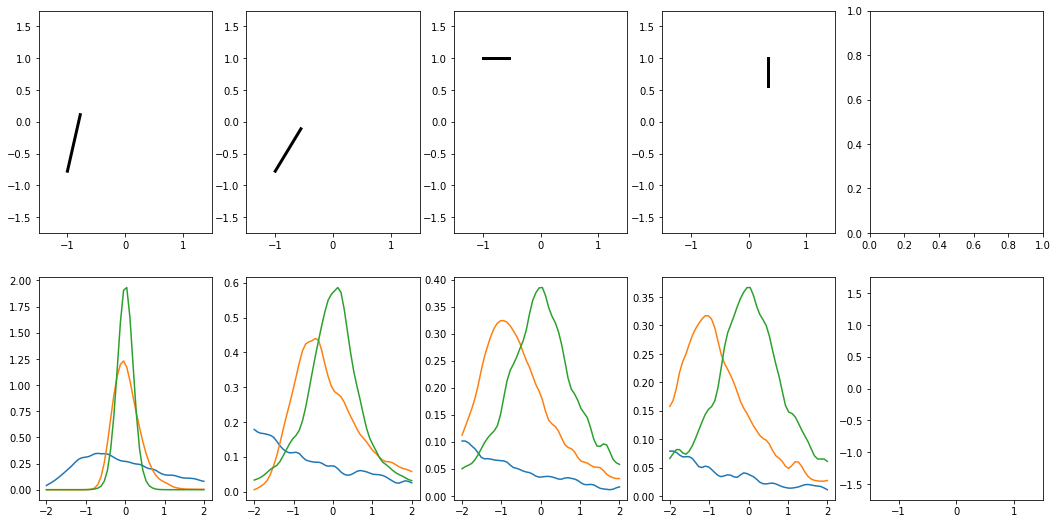

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))

for i in range(5):

    knots = sample_knots(grid, number_of_knot_points=2)
    curve,_ = make_curve(knots)
    pretty_picture_of_curve_ax(ax[0][i], curve)
    
    n_samples = 5000
    for i,n_items in enumerate([1, 2, 4, 8]):
        a = np.sqrt(np.exp(2* (tau - (C/(2*n_items)) - (2*np.pi) -1)))
        model = IsotropicGaussian(knots, C, tau, a=a)
        curves, samples = model.sample_curves(n=n_samples, return_samples=True)
        slopes = np.array ([slope(s[0], s[1]) for s in samples]) - slope(knots[0], knots[1])
        slopes = np.array ([slope(s[0], s[1]) for s in samples]) - slope(knots[0], knots[1])
        kde = KernelDensity(kernel="gaussian", bandwidth=.1).fit(slopes.reshape(-1, 1))
        x = np.linspace(-2, 2, 50)
        log_dens = kde.score_samples(x.reshape(-1, 1))
        ax[1][i].plot(x, np.exp(log_dens), label=f'{n_items} items')

plt.legend()
plt.tight_layout()
plt.show()

0.0030788925535813146
0.04816198282664061
0.19048433720734687
0.378823338772799


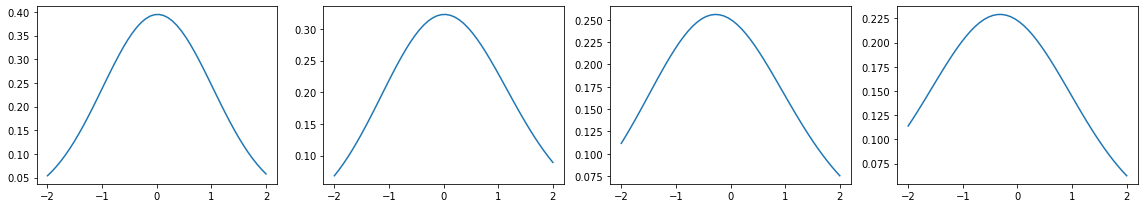

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(16, 3), sharex=True)
n_samples = 500
for i,n_items in enumerate([1, 2, 4, 8]):
    a = np.sqrt(np.exp(2* (tau - (C/(2*n_items)) - (2*np.pi) -1)))
    print(a)
    model = IsotropicGaussian(knots, C, tau, a=a)
    curves, samples = model.sample_curves(n=n_samples, return_samples=True)
    slopes = np.array ([slope(s[0], s[1]) for s in samples]) - slope(knots[0], knots[1])
    kde = KernelDensity(kernel="gaussian").fit(slopes.reshape(-1, 1))
    x = np.linspace(-2, 2, 50)
    log_dens = kde.score_samples(x.reshape(-1, 1))
    ax[i].plot(x, np.exp(log_dens))
    
    
plt.tight_layout()
plt.show()

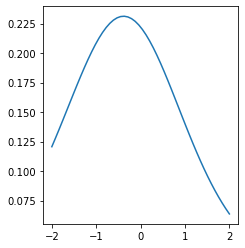

In [23]:
from sklearn.neighbors import KernelDensity
fig, ax = plt.subplots(figsize=(3.5, 4))

kde = KernelDensity(kernel="gaussian").fit(slopes.reshape(-1, 1))
x = np.linspace(-2, 2, 50)
log_dens = kde.score_samples(x.reshape(-1, 1))

ax.plot(x, np.exp(log_dens))
plt.show()

[]

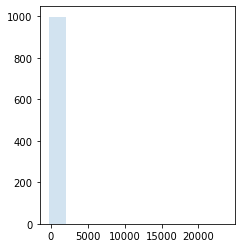

In [6]:
n_samples = 1000


curves, samples = model.sample_curves(n=n_samples, return_samples=True)

slopes = np.array ([slope(s[0], s[1]) for s in samples]) - slope(knots[0], knots[1])

fig, ax = plt.subplots(figsize=(3.5, 4))
ax.hist(slopes, bins=10, alpha=.2)
plt.plot()

In [7]:
slope(samples[0]

SyntaxError: unexpected EOF while parsing (<ipython-input-7-87cae7a62995>, line 1)

In [ ]:
def slope(p1, p2):
    return (p2[1] - p1[1]) / (p2[0] - p1[0])

In [ ]:
slopes = np.array ([slope(s[0], s[1]) for s in samples]) - slope(knots[0], knots[1])

In [ ]:
slopes

In [ ]:

fig, ax = plt.subplots(figsize=(3.5, 4))
ax.hist(slopes, bins=10, alpha=.2)
plt.plot()
#kde = KernelDensity(kernel='gaussian', bandwidth=.001).fit(slopes.reshape(-1, 1))
#s = np.linspace(-1, 1, 100)
#e = kde.score_samples(s.reshape(-1,1))
#plt.plot(s, e)

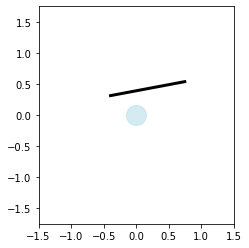

In [16]:
fig, ax = plt.subplots(figsize=(3.5, 4))
pretty_picture_of_curve_ax(ax, curves[1])
plt.show()